# EMAIL SPAM DETECTION

### LOADING DATA

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from nltk.tokenize import word_tokenize
import nltk

# Download the 'punkt' resource
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\phiri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phiri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### DATA EXPLORATION

In [44]:
Data_path = "C:\\Users\\phiri\\OneDrive\\Desktop\\Desktop\\Oasis datascience\\Task_4_spam_detection\\EmailSpam\\spam.csv"
spam_data = pd.read_csv(Data_path,encoding='ISO-8859-1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
spam_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [46]:
spam_data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

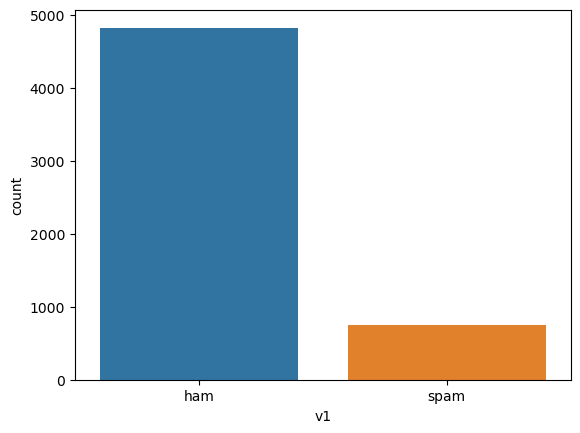

In [47]:
#Checking the class distribution of the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='v1', data=spam_data)
plt.show()


### PREPROCESSING

In [48]:
#Removing columns with missing data
cols_with_missing = [col for col in spam_data.columns
                     if spam_data[col].isnull().any()]

if cols_with_missing:
    print(cols_with_missing)
else:
    print("No columns with msiing values,therefore no need for imputation")

['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [49]:
new_spam_df = spam_data.drop(cols_with_missing, axis =1)
print(new_spam_df.head(10))

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...


In [50]:
# Converting  text to lowercase to ensure the text is uniform throughout
new_spam_df['v2'] = new_spam_df['v2'].str.lower()

# tokenization (will be breaking down text into individual words)

from nltk.tokenize import word_tokenize

# Tokenize the text
new_spam_df['v2'] = new_spam_df['v2'].apply(word_tokenize)


In [51]:
import string

# Remove punctuation(So that it wont confuse the models when train on the data)
new_spam_df['v2'] = new_spam_df['v2'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])


In [52]:
from nltk.corpus import stopwords

# Removing all stop words(to reduce dimensionality and allow model to focus on important words)
stop_words = set(stopwords.words('english'))
new_spam_df['v2'] = new_spam_df['v2'].apply(lambda tokens: [token for token in tokens if token not in stop_words])


In [53]:
# Breaking down text into individual items or tokens
from sklearn.feature_extraction.text import CountVectorizer

new_spam_df['v2'] = new_spam_df['v2'].apply(lambda tokens: ' '.join(tokens))

# Instantiate the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(new_spam_df['v2'])


###### LOADING FEATURES

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(new_spam_df['v2'])


In [55]:
#Encoding the target variable classes
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(new_spam_df['v1'])


In [56]:
print(y)

[0 0 1 ... 0 0 0]


### MODEL TRAINING AND EVALUATION

In [57]:
#Checking for consistency in the distribution
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y,stratify = y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,stratify = y_val, test_size=0.5, random_state=42)


In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)

print(y_test.shape)

(3900, 8606)
(3900,)
(836, 8606)
(836,)
(836, 8606)
(836,)


#### DECISION TREE CLASSIFIER

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
DT_classifier = DecisionTreeClassifier(random_state = 42)
DT_classifier.fit(X_train,y_train)

#Predictions on validation set
predictions_val = DT_classifier.predict(X_val)
DT_accuracy_val = accuracy_score(y_val,predictions_val)

# Inverse transforming the encoded labels back to their original names(validation set)
predicted_labels_val = label_encoder.inverse_transform(predictions_val)
actual_labels_val = label_encoder.inverse_transform(y_val)

#Predictions on test set
predictions_test = DT_classifier.predict(X_test)
DT_accuracy_test = accuracy_score(y_test,predictions_test)

# Inverse transforming the encoded labels back to their original names(test set)
predicted_labels_test = label_encoder.inverse_transform(predictions_test)
actual_labels_test = label_encoder.inverse_transform(y_test)

#Classification report of validation predictions and test predictions
#validation
classification_Report_val = classification_report(actual_labels_val, predicted_labels_val, digits=4)

print(f'Validation Accuracy is:\t{DT_accuracy_val}')
print(f'Validation Classification Report:\n{classification_Report_val}')

#Test
classification_Report_test = classification_report(actual_labels_test, predicted_labels_test, digits=4)

print(f'Test Accuracy is:\t{DT_accuracy_test}')
print(f'Test set Classification Report:\n{classification_Report_test}')


Validation Accuracy is:	0.9712918660287081
Validation Classification Report:
              precision    recall  f1-score   support

         ham     0.9795    0.9876    0.9835       724
        spam     0.9151    0.8661    0.8899       112

    accuracy                         0.9713       836
   macro avg     0.9473    0.9268    0.9367       836
weighted avg     0.9708    0.9713    0.9710       836

Test Accuracy is:	0.9677033492822966
Test set Classification Report:
              precision    recall  f1-score   support

         ham     0.9767    0.9862    0.9814       724
        spam     0.9048    0.8482    0.8756       112

    accuracy                         0.9677       836
   macro avg     0.9408    0.9172    0.9285       836
weighted avg     0.9671    0.9677    0.9673       836



Confusion Matrix for Validation Predictions and test predictions: 


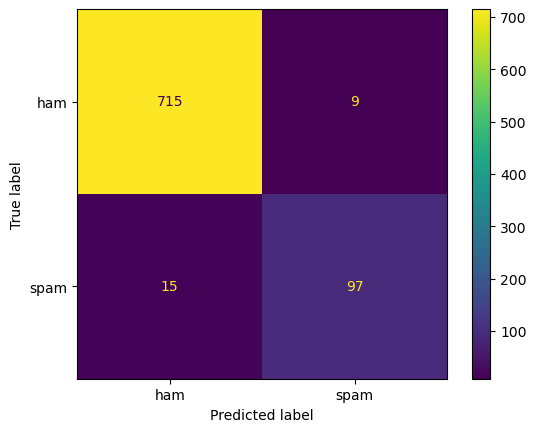

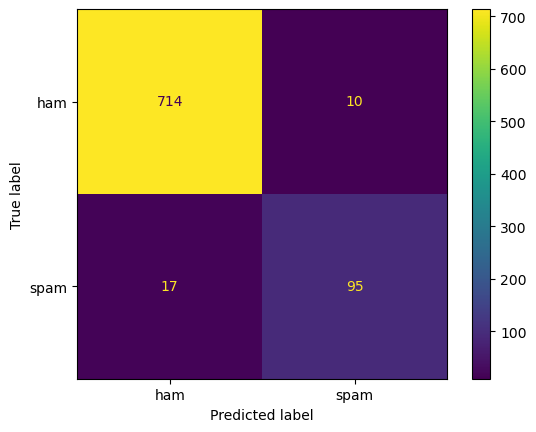

In [60]:
# Compute and display the confusion matrix for validation and test predictions
print("Confusion Matrix for Validation Predictions and test predictions: ")
#Validation Predictions
cm = confusion_matrix(actual_labels_val, predicted_labels_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(actual_labels_val))

disp.plot(cmap='viridis')

#Test predictions
cm = confusion_matrix(actual_labels_test, predicted_labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(actual_labels_test))
disp.plot(cmap='viridis')

### NAIVE BAYES CLASSIFIER

In [61]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Naive Bayes classifier
NVB_classifier = MultinomialNB()

# Train the model
NVB_classifier.fit(X_train, y_train)

#Predictions on validation set
NVB_predictions_val = NVB_classifier.predict(X_val)
NVB_accuracy_val = accuracy_score(y_val,NVB_predictions_val)

# Inverse transforming the encoded labels back to their original names(validation set)
NVB_predicted_labels_val = label_encoder.inverse_transform(NVB_predictions_val)
NVB_actual_labels_val = label_encoder.inverse_transform(y_val)

#Predictions on test set
NVB_predictions_test = NVB_classifier.predict(X_test)
NVB_accuracy_test = accuracy_score(y_test,NVB_predictions_test)

# Inverse transforming the encoded labels back to their original names(test set)
NVB_predicted_labels_test = label_encoder.inverse_transform(NVB_predictions_test)
NVB_actual_labels_test = label_encoder.inverse_transform(y_test)

#Classification report of validation predictions and test predictions
#validation
NVBclassification_Report_val = classification_report(NVB_actual_labels_val, NVB_predicted_labels_val, digits=4)

print(f'Validation Accuracy is:\t{NVB_accuracy_val:.4f}')
print(f'Validation Classification Report:\n{NVBclassification_Report_val}')

#Test
NVBclassification_Report_test = classification_report(NVB_actual_labels_test, NVB_predicted_labels_test, digits=4)

print(f'Test Accuracy is:\t{NVB_accuracy_test:.4f}')
print(f'Test set Classification Report:\n{NVBclassification_Report_test}')


Validation Accuracy is:	0.9617
Validation Classification Report:
              precision    recall  f1-score   support

         ham     0.9577    1.0000    0.9784       724
        spam     1.0000    0.7143    0.8333       112

    accuracy                         0.9617       836
   macro avg     0.9788    0.8571    0.9059       836
weighted avg     0.9633    0.9617    0.9589       836

Test Accuracy is:	0.9689
Test set Classification Report:
              precision    recall  f1-score   support

         ham     0.9653    1.0000    0.9824       724
        spam     1.0000    0.7679    0.8687       112

    accuracy                         0.9689       836
   macro avg     0.9827    0.8839    0.9255       836
weighted avg     0.9700    0.9689    0.9671       836



Confusion Matrix for Validation Predictions and test predictions: 


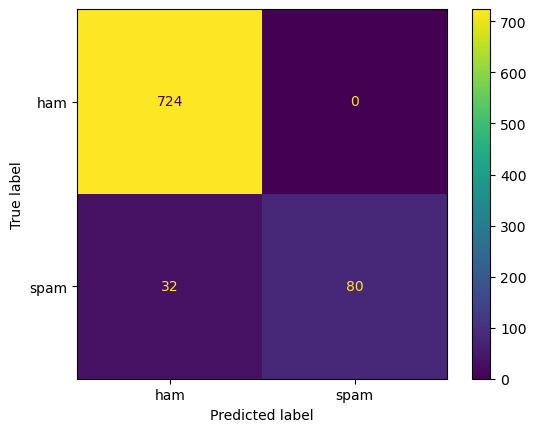

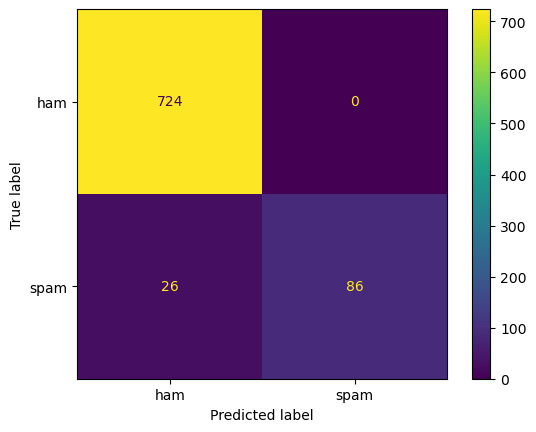

In [62]:
# Compute and display the confusion matrix for validation and test predictions
print("Confusion Matrix for Validation Predictions and test predictions: ")
#Validation Predictions
cm = confusion_matrix(NVB_actual_labels_val, NVB_predicted_labels_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(NVB_actual_labels_val))

disp.plot(cmap='viridis')

#Test predictions
cm = confusion_matrix(NVB_actual_labels_test, NVB_predicted_labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(NVB_actual_labels_test))
disp.plot(cmap='viridis')